# Figures for Network Inference from different dynamics

Start by importing some packages and defining some functions.

is_interactive True
num_trials 100


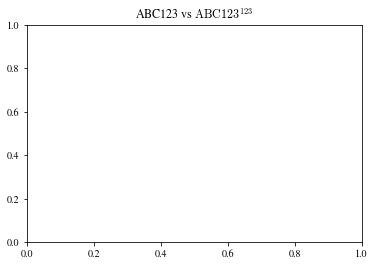

In [1]:
import sys, dill, time
import numpy as np
import matplotlib as mpl
from matplotlib.transforms import Bbox
from matplotlib import pyplot as plt
import seaborn as sns
sys.path.append('../utils/')
from utils import *
import scipy.misc

################################################################################
# This block checks whether code is run in a jupyter notebook or as script. We
# use the script to generate data (`load=False`) and the notebooks to draw
# figures (`draw=True`).

if is_interactive():
    print('is_interactive', is_interactive())
    draw = True
    load = True
    num_trials = 100
    print('num_trials', num_trials)
    rcPhysRev(fontsize=10)
else:
    print('is_interactive', is_interactive())
    draw = False
    load = False
    num_trials = 100
    print('num_trials', num_trials)

The cell below makes a figure to show accuracy as a function of parameters of the  stochastic difference model. You can find it in Section 6A of our paper.

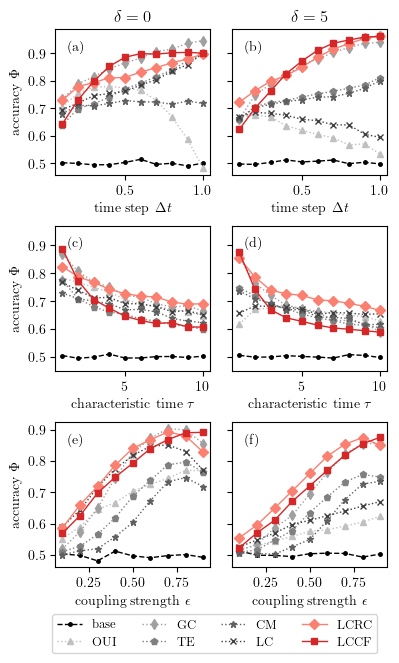

In [2]:
################################################################################
# This cell makes a figure to show accuracy as a function of parameters of the 
# stochastic difference model. You can find it in Section 6A of our paper.

t = time.time()

# set values for lags
nolag=1
alag=5+1

# decide what should be plotted
xvars=repeatList(['dt', 'ctime', 'epsilon'], 2)
plotvars=Variable('max_lag',tileList([nolag, alag], 3))
lvs=Variable('inference_method', ['base','OUI','GC','TE','CM','LC','LCRC','LCCF'])

# make specifications to get pretty lines and legends
linevar_labels=['base','OUI','GC','TE','CM','LC','LCRC','LCCF']
lcs=['k','#c0c0c0','#a0a0a0','#808080','#606060','#404040', 'salmon', 'tab:red']
linestyles=['--', ':', ':', ':', ':', ':', '-', '-']
linewidths=[1, 1, 1, 1, 1, 1, 1, 1]
markers=['.', '^', 'd', 'p', '*', 'x', 'D', 's']
markersizes=[5]*8

# make the figure
fig, axes, legend = plot1d(ncols=2, nrows=3, num_trials=num_trials, 
    y='accuracy', xvars=xvars, plotvars=plotvars, default_parameters={}, 
    linevars=lvs, linevar_labels=linevar_labels, 
    linecolors=lcs, linestyles=linestyles, linewidths=linewidths, 
    markers=markers, markersizes=markersizes,
    add_subplotlabels=True, subplotlabelx=0.08, subplotlabely=0.85,
    sharey=False, add_legend=False, fheight=6.4+0.224, 
    draw=draw, load=load, save=True, verbose_lookup=False, verbose_sim=False)

if draw:

    # set subplot titles
    axes[0,0].set_title(r'$\delta=0$')
    axes[0,1].set_title(r'$\delta=5$')

    # set limits
    for i in [0,1,2]:
        ylim = np.zeros((2,2))
        ylim[0] = axes[i,0].get_ylim()
        ylim[1] = axes[i,1].get_ylim()
        axes[i,0].set_ylim([min(ylim[:,0]), max(ylim[:,1])])
        axes[i,1].set_ylim([min(ylim[:,0]), max(ylim[:,1])])

        axes[i,1].set_ylabel('')
        axes[i,0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
        axes[i,1].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
        axes[i,1].set_yticklabels([])

    axes[1,0].set_ylim([0.45, 0.97])
    axes[1,1].set_ylim([0.45, 0.97])

    plt.tight_layout()

    # add legend
    plt.sca(axes[2,0])
    le = plt.legend(#list(axes[2,0].lines)[::-1], 
        ncol=4, fontsize=9,
        bbox_to_anchor=(1.03, -0.28), 
        loc='upper center')#  loc=(1.1, 0))

    # last touches
    plt.subplots_adjust(left=0.16, right=0.99, #top=0.95,
                        bottom=0.135, hspace=0.35)

    # save figure
    plt.savefig('../figures/resultsA1.pdf') 
       
#print(time.time()-t)

The next two cells produce a figure that shows the difference in accuracy between one our proposed pairwise edge scores and crosscorrelation, transfer entropy, Ganger causality, convergent crossmapping, and Ornstein-Uhlenbeck inference. We do not use this figure in the paper, but I am using it for talks because it fits better on slides than the 6-column version (see below) that we use in the paper. 

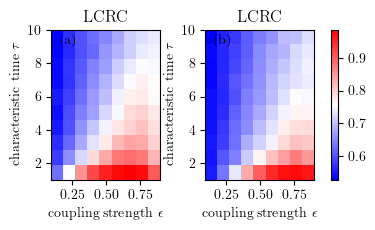

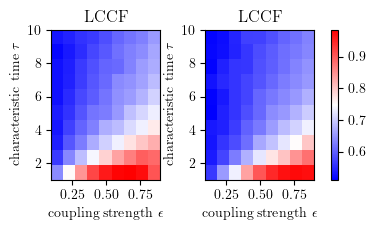

In [3]:
################################################################################
# The output figure of this cell is not used in the paper. We run the code to 
# then grab the data for LRC and LCF accuracy from the plotted heatmaps. We use 
# this data to plot heatmaps of accuracy differences below.

# make figure for LRC accuracy
_, axes, _ = plot2d(ncols=2, nrows=1, num_trials=num_trials,
    x='epsilon', y='ctime', add_subplotlabels=True, subplotlabelx=0.08,
    default_parameters={'dt':1},
    plotvars=[Variable('inference_method',['LCRC','LCRC']),
              Variable('max_lag', [1,6])],
    load=draw, save=True,
    cmap='bwr', draw=draw)

if draw:
    # grab LRC data from figure
    data_LRC = []
    for i, ax in enumerate(axes.flat):
        img = [obj for obj in ax.get_children() 
            if isinstance(obj, mpl.image.AxesImage)][0]
        data_LRC.append(img.get_array())

# make figure for LCF accuracy
_, axes, _ = plot2d(ncols=2, nrows=1, num_trials=num_trials,
    x='epsilon', y='ctime',
    default_parameters={'dt':1},
    plotvars=[Variable('inference_method',['LCCF','LCCF']),
              Variable('max_lag', [1,6])],
    load=draw, save=True,
    cmap='bwr', draw=draw)

if draw:
    # grab LCF data from figure
    data_LCF = []
    for i, ax in enumerate(axes.flat):
        img = [obj for obj in ax.get_children() 
               if isinstance(obj, mpl.image.AxesImage)][0]
        data_LCF.append(img.get_array())

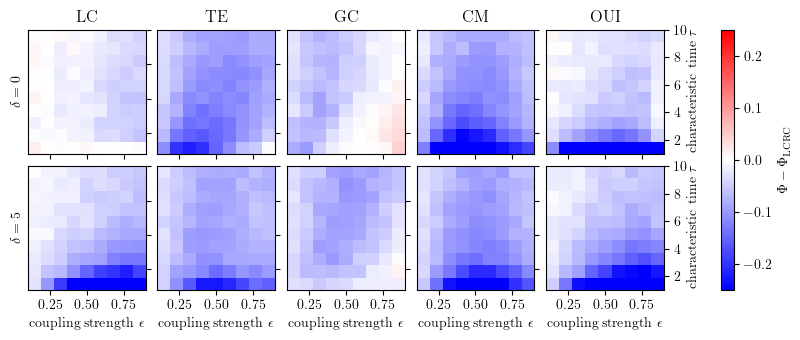

In [4]:
################################################################################
# This figure show the difference in accuracy between one our proposed pairwise
# edge scores and crosscorrelation, transfer entropy, Ganger causality, 
# convergent crossmapping, and Ornstein-Uhlenbeck inference. We do not use this
# figure in the paper, but I am using it for talks because it fits better on 
# slides than the 6-column version (see below) that we use in the paper. 
 
t = time.time()

ncols=5
nrows=2
fig, axes, cb = plot2d(ncols=ncols, nrows=nrows, num_trials=num_trials,
    x='epsilon', y='ctime',
    default_parameters={'dt':1},
    plotvars=[Variable('inference_method',['LC','TE','GC','CM','OUI']*2),
              Variable('max_lag', repeatList([1,6], 5))],
    vmin=-0.25, vmax=0.25, #vmin=-0.125, vmax=0.125,
    cmap='bwr', fheight=3.5, draw=draw)
    
if draw:
    # make difference plots with respect to accuracy of LCF
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            img = [obj for obj in ax.get_children() 
                   if isinstance(obj, mpl.image.AxesImage)][0]
            new_data = img.get_array()-data_LRC[row]
            #print(np.max(new_data), np.min(new_data))
            img.set_array(new_data)

    for i in range(0,ncols):
        for j in range(nrows):
            if i==0:
                #axes[j,i].yaxis.set_label_position('right')

                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
                axes[j,i].set_ylabel([r'$\delta=0$',r'$\delta=5$'][j])
            elif i==ncols-1:
                axes[j,i].yaxis.tick_right()
                axes[j,i].yaxis.set_label_position('right')
                axes[j,i].yaxis.set_ticks([2,4,6,8,10])
                axes[j,i].yaxis.labelpad = 0
            else:
                axes[j,i].set_ylabel('')
                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
    for i in range(ncols):
        axes[0,i].set_xlabel('')
        axes[0,i].set_xticklabels([]) 
        axes[1,i].set_title('')
    plt.subplots_adjust(left=0.03, hspace=0.1, wspace=0.1, right=0.825)
    cbax = fig.axes[-1]
    bbox = cbax.get_position()
    bbox.x0 += 0.05
    bbox.x1 += 0.05
    cbax.set_position(bbox)
    cbax.set_ylabel(r'$\Phi-\Phi$\textsubscript{LCRC}')
    plt.savefig('../figures/resultsA2.pdf')

#print(time.time()-t)

Th comparison figure below includes 1 more column (LCCF) than the one above. We use this figure in Section 6A of our paper.

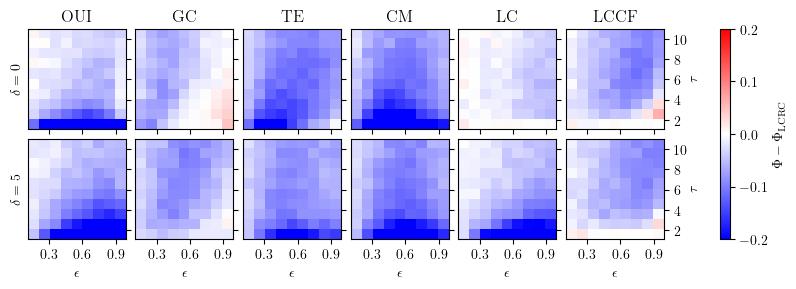

In [5]:
################################################################################
# This comparison figure includes 1 more column (LRC) than the one above. We 
# use this in Section 6A of our paper.

t = time.time()

# plot accuracy differences
ncols=6
nrows=2
fig, axes, cb = plot2d(ncols=ncols, nrows=nrows, num_trials=num_trials,
    x='epsilon', y='ctime', default_parameters={'dt':1},
    plotvars=[Variable('inference_method',
                       ['OUI','GC','TE','CM','LC','LCCF']*2),
              Variable('max_lag', repeatList([1,6], 6))],
    vmin=-0.2, vmax=0.2, #vmin=-0.125, vmax=0.125,
    add_subplotlabels=False, subplotlabelx=0.06, subplotlabely=0.85,
    cmap='bwr', fheight=3., draw=draw, verbose_xlabel=False, 
    verbose_ylabel=False)
    
if draw:
    # make difference plots with respect to accuracy of LRC
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            img = [obj for obj in ax.get_children() 
                   if isinstance(obj, mpl.image.AxesImage)][0]
            new_data = img.get_array()-data_LRC[row]
            #print(np.max(new_data), np.min(new_data))
            img.set_array(new_data)

    for i in range(0,ncols):
        axes[0,i].set_title(['OUI','GC','TE','CM','LC','LCCF'][i])
        for j in range(nrows):
            axes[j,i].yaxis.set_ticks(np.array([2,4,6,8,10])*10/11)
            axes[j,i].yaxis.set_ticklabels(np.array([2,4,6,8,10]))
            axes[j,i].xaxis.set_ticks(np.array([0.3, 0.6, 0.9])*10/11)
            axes[j,i].xaxis.set_ticklabels(np.array([0.3, 0.6, 0.9]))
            if i==0:
                #axes[j,i].yaxis.set_label_position('right')

                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
                axes[j,i].set_ylabel([r'$\delta=0$',r'$\delta=5$'][j])
            elif i==ncols-1:
                axes[j,i].yaxis.tick_right()
                axes[j,i].yaxis.set_label_position('right')
                #axes[j,i].yaxis.set_ticks([2,4,6,8,10])
                axes[j,i].yaxis.labelpad = 0
            else:
                axes[j,i].set_ylabel('')
                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
    for i in range(ncols):
        axes[0,i].set_xlabel('')
        axes[0,i].set_xticklabels([]) 
        axes[1,i].set_title('')
    plt.subplots_adjust(left=0.03, hspace=0.1, wspace=0.1, right=0.825)
    cbax = fig.axes[-1]
    bbox = cbax.get_position()
    bbox.x0 += 0.05
    bbox.x1 += 0.05
    cbax.set_position(bbox)
    cbax.set_ylabel(r'$\Phi-\Phi$\textsubscript{LCRC}')
    plt.savefig('../figures/resultsA2.pdf')

#print(time.time()-t)

Below is another comparison figure. This time we use LRC instead of LCF as base line for the comparison. This figure does not appear in our paper.


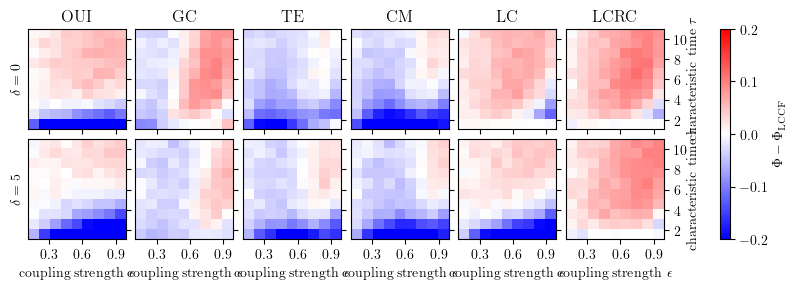

In [6]:
################################################################################
# Another comparison figure. This time we use LRC instead of LCF as base line
# for the comparison. This figure does not appear in our paper.

t = time.time()

# plot accuracy differences
ncols=6
nrows=2
fig, axes, cb = plot2d(ncols=ncols, nrows=nrows, num_trials=num_trials,
    x='epsilon', y='ctime',
    default_parameters={'dt':1},
    plotvars=[Variable('inference_method',
                       ['OUI','GC','TE','CM','LC', 'LCRC']*2),
              Variable('max_lag', [1,1,1,1,1,1,6,6,6,6,6,6])],
    vmin=-0.2, vmax=0.2, #vmin=-0.125, vmax=0.125,
    cmap='bwr', fheight=3., draw=draw)
    
if draw:
    # make difference plots with respect to accuracy of LRC
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            img = [obj for obj in ax.get_children() if isinstance(obj, mpl.image.AxesImage)][0]
            new_data = img.get_array()-data_LCF[row]
            #print(np.max(new_data), np.min(new_data))
            img.set_array(new_data)

    for i in range(0,ncols):
        for j in range(nrows):
            axes[j,i].yaxis.set_ticks(np.array([2,4,6,8,10])*10/11)
            axes[j,i].yaxis.set_ticklabels(np.array([2,4,6,8,10]))
            axes[j,i].xaxis.set_ticks(np.array([0.3, 0.6, 0.9])*10/11)
            axes[j,i].xaxis.set_ticklabels(np.array([0.3, 0.6, 0.9]))
            if i==0:
                #axes[j,i].yaxis.set_label_position('right')

                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
                axes[j,i].set_ylabel([r'$\delta=0$',r'$\delta=5$'][j])
            elif i==ncols-1:
                axes[j,i].yaxis.tick_right()
                axes[j,i].yaxis.set_label_position('right')
                #axes[j,i].yaxis.set_ticks([2,4,6,8,10])
                axes[j,i].yaxis.labelpad = 0
            else:
                axes[j,i].set_ylabel('')
                axes[j,i].set_yticklabels([])
                axes[j,i].yaxis.tick_right()
    for i in range(ncols):
        axes[0,i].set_xlabel('')
        axes[0,i].set_xticklabels([]) 
        axes[1,i].set_title('')
    plt.subplots_adjust(left=0.03, hspace=0.1, wspace=0.1, right=0.825)
    cbax = fig.axes[-1]
    bbox = cbax.get_position()
    bbox.x0 += 0.05
    bbox.x1 += 0.05
    cbax.set_position(bbox)
    cbax.set_ylabel(r'$\Phi-\Phi$\textsubscript{LCCF}')
    #plt.savefig('../figures/resultsA2.pdf')

#print(time.time()-t)

The next two cells produce a figure that shows accuracy as a function of parameters the maximum transmission lag on edges and the expected maximum transmission lag on edges (during the inference). You can find it in Section 6A of our paper.

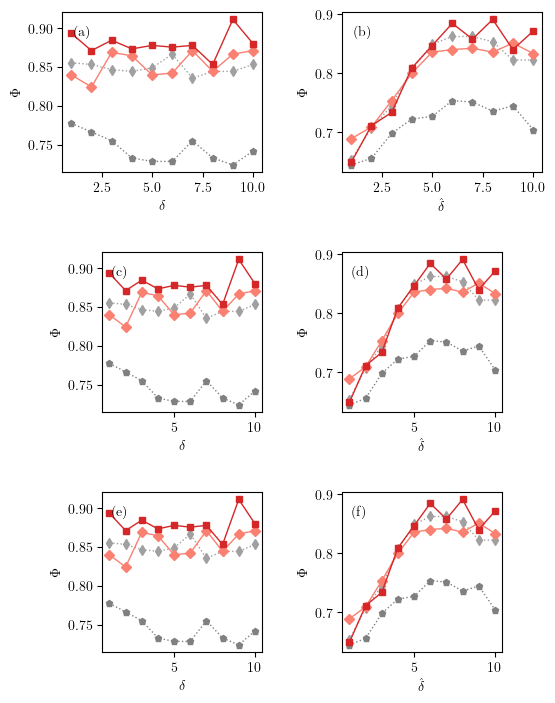

In [7]:
################################################################################
# The output figure of this cell is not used in the paper. We run the code to 
# then grab the 1D accuracy data for varying max_inf and max_inf_lag. We use 
# the grabbed data to plot heatmaps of accuracy differences below.

if True:
    methods4 = ['GC','TE','LCRC','LCCF']
    fig1d2, axes1d2, legend = plot1d(ncols=2,nrows=3, num_trials=10, 
        xvars=tileList(['max_lag','max_lag_inf'],3),
        linevars = Variable('inference_method', methods4),
        default_parameters={'max_lag':6}, add_subplotlabels=True, 
        subplotlabelx=0.06, subplotlabely=0.85, y='accuracy', 
        load=True, save=True, verbose_lookup=False,
        linecolors=['#a0a0a0','#808080', 'salmon', 'tab:red'],
        sharey=False, add_legend=False,
        linestyles=[':', ':',  '-', '-'], 
        linewidths=[1, 1, 1, 1], 
        markers=['d', 'p', 'D', 's'], markersizes=[5]*4,
        draw=draw, verbose_xlabel=False, verbose_ylabel=False)
    
    if draw:
        pos = fig1d2.axes[0].get_position()
        pos.x0 -= 0.1
        fig1d2.axes[0].set_position(pos)
    
        pos = fig1d2.axes[1].get_position()
        pos.x1 += 0.1
        fig1d2.axes[1].set_position(pos)

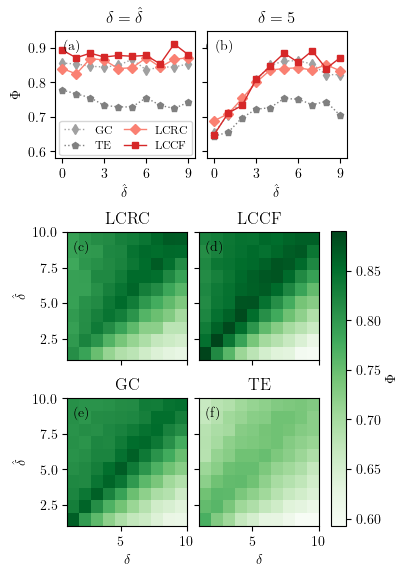

In [8]:
################################################################################
# This cell makes a figure to show accuracy as a function of parameters the 
# maximum transmission lag on edges and the expected maximum transmission lag on
# edges (during the inference). You can find it in Section 6A of our paper.

cmap = 'Greens'
subplotlabelx=0.06
subplotlabely=0.85
fig2d, axes2d, cb = plot2d(nrows=3, ncols=2, num_trials=num_trials,
    x='max_lag', y='max_lag_inf', z='accuracy',
    plotvars=Variable('inference_method',['LCCF','LCCF','LCRC','LCCF','GC','TE']),
    load=draw, save=True, cmap=cmap, verbose_xlabel=False, verbose_ylabel=False,
    add_subplotlabels=True, subplotlabelx=subplotlabelx, 
    subplotlabely=subplotlabely, fheight=6.4-0.5, draw=draw)

if draw:
    # remove unnecessary x and y labels
    for i in range(2):
        axes2d[1,i].set_xticklabels([])
        axes2d[1,i].set_xlabel('')
        axes2d[i+1,1].set_yticklabels([])
        axes2d[i+1,1].set_ylabel('')
        
        axes2d[0,i].set_xlabel('')
        axes2d[0,i].set_ylabel('')
        axes2d[0,i].set_xticks([])
        axes2d[0,i].set_yticks([])
        axes2d[0,i].set_title('')
        axes2d[0,i].axis('off')

    if True:
        # move colorbar
        cbar = fig2d.get_axes()[-1]
        bbox = cbar.get_position()
        bbox.y0  = -0.5 #+= -0.875
        bbox.y1 = 1.5
        bbox.x0 += 0.0125
        bbox.x1 += -0.02
        cbar.set_position([0,0,1,1])

        # add label to colorbar
        cbar.set_ylabel('accuracy')

    plt.subplots_adjust(wspace=0.1, hspace=0.3, right=0.8, bottom=0.07, top=0.85)
        
    if True:
        # move colorbar
        for i in range(2):
            bbox = axes2d[0,i].get_position()
            bbox.y0 += 0.06
            bbox.y1 += 0.06
            axes2d[0,i].set_position(bbox)

        cbar.set_position([0.83,0.07,0.04,0.5])    
    
    if True:
        # add new axes
        shift = 0.02
        stretch = 0.05
        new_axes = [0,0]
        pos = axes2d[0,0].get_position()
        pos.x0 += shift - stretch
        pos.x1 += shift
        new_axes[0] = fig2d.add_axes(pos)

        pos = axes2d[0,1].get_position()
        pos.x0 += shift
        pos.x1 += shift + stretch
        new_axes[1] = fig2d.add_axes(pos)
        
        axes2d[1,0].set_title('LCRC')
        axes2d[1,1].set_title('LCCF')
        axes2d[2,0].set_title('GC')
        axes2d[2,1].set_title('TE')
        
    
    if True:
        #print(fig2d.axes[0].get_children())
        # add data to new plots
        img = fig2d.axes[0].get_children()[0]
        fig2d.axes[0].get_children().pop(-2)
        img.remove()
        copy_lines(new_axes[0], axes1d2[0,0])
        new_axes[0] = fig2d.axes[0]

        img = fig2d.axes[1].get_children()[0] 
        fig2d.axes[1].get_children().pop(-2)
        img.remove()
        copy_lines(new_axes[1], axes1d2[0,1])
        new_axes[1] = fig2d.axes[1]

    if True:
        # polish new plots
        for i in range(2):
            fig2d.axes[-2+i].set_xlim(0.5,10.5)
            #axes2d[0,i].set_ylim(0.475,0.925)
            fig2d.axes[-2+i].set_ylim(0.58,0.95)
            fig2d.axes[-2+i].set_xticks([1,4,7,10])
            fig2d.axes[-2+i].set_xticklabels(np.array([1,4,7,10])-1)
            #axes2d[0,i].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
            fig2d.axes[-2+i].set_yticks([0.6, 0.7, 0.8, 0.9])
            #axes2d[0,i].set_yticklabels([0.5, 0.6, 0.7, 0.8, 0.9])
            fig2d.axes[-2+i].set_yticklabels([0.6, 0.7, 0.8, 0.9])
        fig2d.axes[-1].set_yticklabels([])
        fig2d.axes[-1].set_ylabel('')
        fig2d.axes[-2].set_title('$\delta=\hat\delta$')
        fig2d.axes[-1].set_title('$\delta=5$')
        fig2d.axes[-2].set_xlabel(r'$\hat \delta$')

    if True:
        # add legend to new axes
        plt.sca(fig2d.axes[-2])
        plt.text(subplotlabelx, subplotlabely, '(a)', transform=fig2d.axes[-2].transAxes)
        #plt.xlim([0,1])
        le = plt.legend(list(axes1d2[0,0].lines), 
            #[ll.get_label() for ll in list(axes1d2[0,0].lines)],
            methods4,
            columnspacing=1.,
            ncol=2, fontsize=8,
            bbox_to_anchor=(-0.01, -0.02), 
            loc='lower left')#  loc=(1.1, 0))
        plt.sca(fig2d.axes[-1])
        plt.text(subplotlabelx, subplotlabely, '(b)', transform=fig2d.axes[-1].transAxes)
        
    cb.set_label(r'$\Phi$')
    plt.savefig('../figures/resultsA3.pdf')